In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.mixture._gaussian_mixture  import _compute_precision_cholesky
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import warnings
%matplotlib inline

# numpy produces many warnings, we don't need them here
warnings.filterwarnings('ignore')

# define commonly used colors
GRAY = '#231F20'
RED, GREEN = '#DD443C', '#55CE38'

# define path to data folder
data_path = './data/mixture.txt'

# load  data that was used 
df = pd.read_csv(data_path)
X_train = df[['x1', 'x2']].values
y_train = df.y.values


In [2]:
def visualize_data(ax, title):
  ax.set_aspect(1.3)
  ax.scatter(X_train[:, 0], X_train[:, 1], s=18, facecolors='none',
              edgecolors=np.array([GREEN, RED])[y_train])
  ax.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
  ax.set_xlim(-2.7, 4.3)
  ax.set_ylim(-2.0, 3.0)
  fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
  ax.text(-2.7, 3.2, title, color=GRAY, fontsize=9)
  for spine in ax.spines.values():
      spine.set_color(GRAY)

# given a model prediction function computes X points on n x n grid and the
# corresponding predicted classes
def background_plot(n1, n2, classifier):
  x1, x2 = np.linspace(-2.7, 4.3, n1), np.linspace(-2.0, 3.0, n2)
  X = np.transpose([np.tile(x1, n2), np.repeat(x2, n1)])
  y = classifier(X)
  return X, y

# given a model prediction function computes X0 and X1 n x n meshgrids
# and the corresponing predicted classes meshgrid
def boundary_plot(classifier):
  n1, n2 = 500, 500
  X, y = background_plot(n1, n2, classifier)
  return X[:, 0].reshape(n1, n2), X[:, 1].reshape(n1, n2), y.reshape(n1, n2)
  
def visualize_model(ax, classifier, title):
  visualize_data(ax, title)
  #  plot background dots
  X, y = background_plot(70, 100, classifier)
  ax.scatter(X[:, 0], X[:, 1], marker='o', lw=0, s=1,c=np.array([GREEN, RED])[y])

  # plot the decision boundary
  X0, X1, Y = boundary_plot(classifier)
  ax.contour(X0, X1, Y, colors=GRAY, linewidths=0.5)


<Figure size 720x720 with 0 Axes>

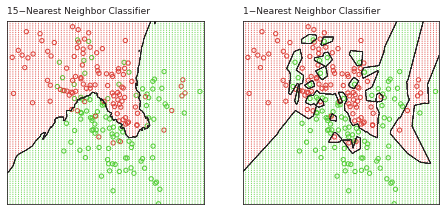

In [3]:
classifier_neighbors_15 = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)
classifier_neighbors_1 = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

plt.figure(figsize=(10, 10))
fig, axs = plt.subplots(1,2)

visualize_model(axs[0], classifier_neighbors_15.predict, '15−Nearest Neighbor Classifier')
visualize_model(axs[1], classifier_neighbors_1.predict, '1−Nearest Neighbor Classifier')

# plt.savefig('out.png', dpi=300, bbox_inches='tight') 